In [24]:
# Packages

import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

from datetime import datetime, timedelta
from seaborn import set_style
from sklearn.metrics import mean_squared_error




In [19]:
# Choose line here
# Options: '21', '22', '34', '47', '54', '60', '62', '63', '77', '79', '97', '94', '146', '152'

line = '152'

In [20]:
# Import data
df = pd.read_csv('../Data/CTA_Average_Bus_Ridership_1999_2024_cleaned.csv')

# Sort by date
df['DATE'] = pd.to_datetime(df['DATE'])
df.sort_values('DATE', inplace=True)

# Consider ridership averages in thousands
df = df.rename(columns={'Sunday - Holiday': 'SundayHoliday'})
df['Weekday'] = df['Weekday'].div(1000)
df['Saturday'] = df['Saturday'].div(1000)
df['SundayHoliday'] = df['SundayHoliday'].div(1000)

# Show first 5 rows
df.head()

,BUS,YEAR,MONTH,Weekday,Saturday,SundayHoliday,Sum,DATE
0,103,1999,1,3.640,1.337,0.944,5921,1999-01-01
18038,8,1999,1,17.505,10.464,7.264,35233,1999-01-01
17727,79,1999,1,27.251,19.609,13.719,60579,1999-01-01
17416,78,1999,1,7.985,4.004,2.808,14797,1999-01-01
2177,146,1999,1,8.266,4.088,2.938,15292,1999-01-01


In [4]:
"""
This function takes in a single bus route as a string, retricts the bus
dataframe to this one route. If only the bus route is given, the function
will plot the Weekday, Saturday, and Sunday-Holiday ridership averages
and return the restricted dataframe. If a second False argument is given,
the function will just return the restricted dataframe.
"""

def plot_bus_routes(bus_route, plot=True, save = True):
    # Restrict dataframe to bus route
    bus_route_df = df[df['BUS'] == bus_route]

    # Plot!
    if plot:
        # Create plot
        plt.figure(figsize=(20,8))

        # Plot all day types
        plt.plot(bus_route_df.DATE, bus_route_df.Weekday, 'r', label='Weekday Average')
        plt.plot(bus_route_df.DATE, bus_route_df.Saturday, 'g', label='Saturday Average')
        plt.plot(bus_route_df.DATE, bus_route_df.SundayHoliday, 'b', label='Sunday/Holiday Average')

        # Aesthetics
        plt.title(bus_route + " Bus Ridership", fontsize=24)
        plt.xlabel("Date", fontsize=18)
        plt.ylabel("Ridership on Day Type by Month in Thousands", fontsize=18)

        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)

        plt.legend(fontsize=14, loc=3)

        # Save!
        if save:
            plt.savefig(bus_route+"bus.png")

        # Show!
        plt.show()

    # Return dataframe
    return bus_route_df

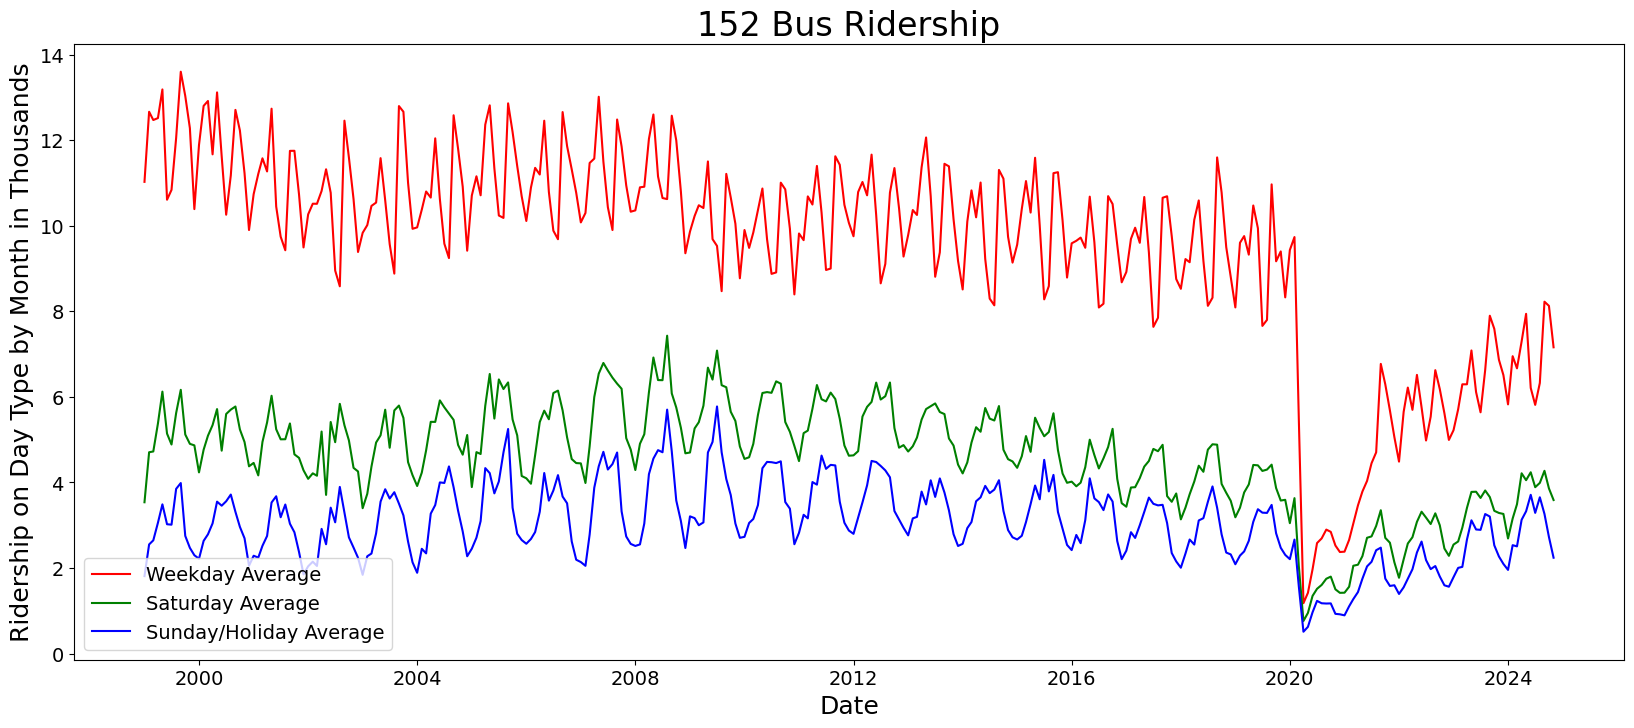

In [5]:
# Plot all data for chosen line

df_line = plot_bus_routes(line, plot=True, save=False)

In [6]:
# Make traing and test sets
# Only start training 4 months after start of COVID impact

df_line_train = df_line.drop(df_line.tail(12).index, inplace=False)[-40:]
df_line_test = df_line.tail(12)

In [7]:
# Create the Rolling Averages for each day type

# New test/train sets
df_line_train_train = df_line_train.drop(df_line_train.tail(12).index)
df_line_train_test = df_line_train.tail(12)

In [99]:
df_line_train_train.Weekday.rolling(window=3, closed = 'left').mean()

3061         NaN
3062         NaN
3052         NaN
3053    2.811667
3054    2.756333
3063    2.581667
3067    2.427333
3068    2.471667
3069    2.695333
3070    3.055667
3071    3.432333
3072    3.762667
3073    4.091333
3074    4.396333
3064    5.308000
3065    5.923000
3066    6.249667
3075    5.678667
3079    5.076333
3080    5.064667
3081    5.451333
3082    5.854667
3083    6.143000
3084    5.989000
3085    5.750333
3086    5.424333
3076    5.713667
3077    6.114333
Name: Weekday, dtype: float64

In [100]:
time_series = pd.DataFrame({'Total_Weekday_Average':df_line_train_train.Weekday,
             'Rolling_Weekday_Average':df_line_train_train.Weekday.rolling(window=12, closed = 'left').mean(),
                           'Rolling_Avg_Prediction':df_line_train_test.Weekday.mean()*np.ones(12)})
     

ValueError: array length 12 does not match index length 28

In [101]:
time_series

,Total_Weekday_Average
3061,2.692
3062,2.898
3052,2.845
3053,2.526
3054,2.374
3063,2.382
3067,2.659
3068,3.045
3069,3.463
3070,3.789


In [97]:
df_line_train_train.Weekday.rolling(window=3, closed = 'left').mean()

3061         NaN
3062         NaN
3052         NaN
3053    2.811667
3054    2.756333
3063    2.581667
3067    2.427333
3068    2.471667
3069    2.695333
3070    3.055667
3071    3.432333
3072    3.762667
3073    4.091333
3074    4.396333
3064    5.308000
3065    5.923000
3066    6.249667
3075    5.678667
3079    5.076333
3080    5.064667
3081    5.451333
3082    5.854667
3083    6.143000
3084    5.989000
3085    5.750333
3086    5.424333
3076    5.713667
3077    6.114333
Name: Weekday, dtype: float64

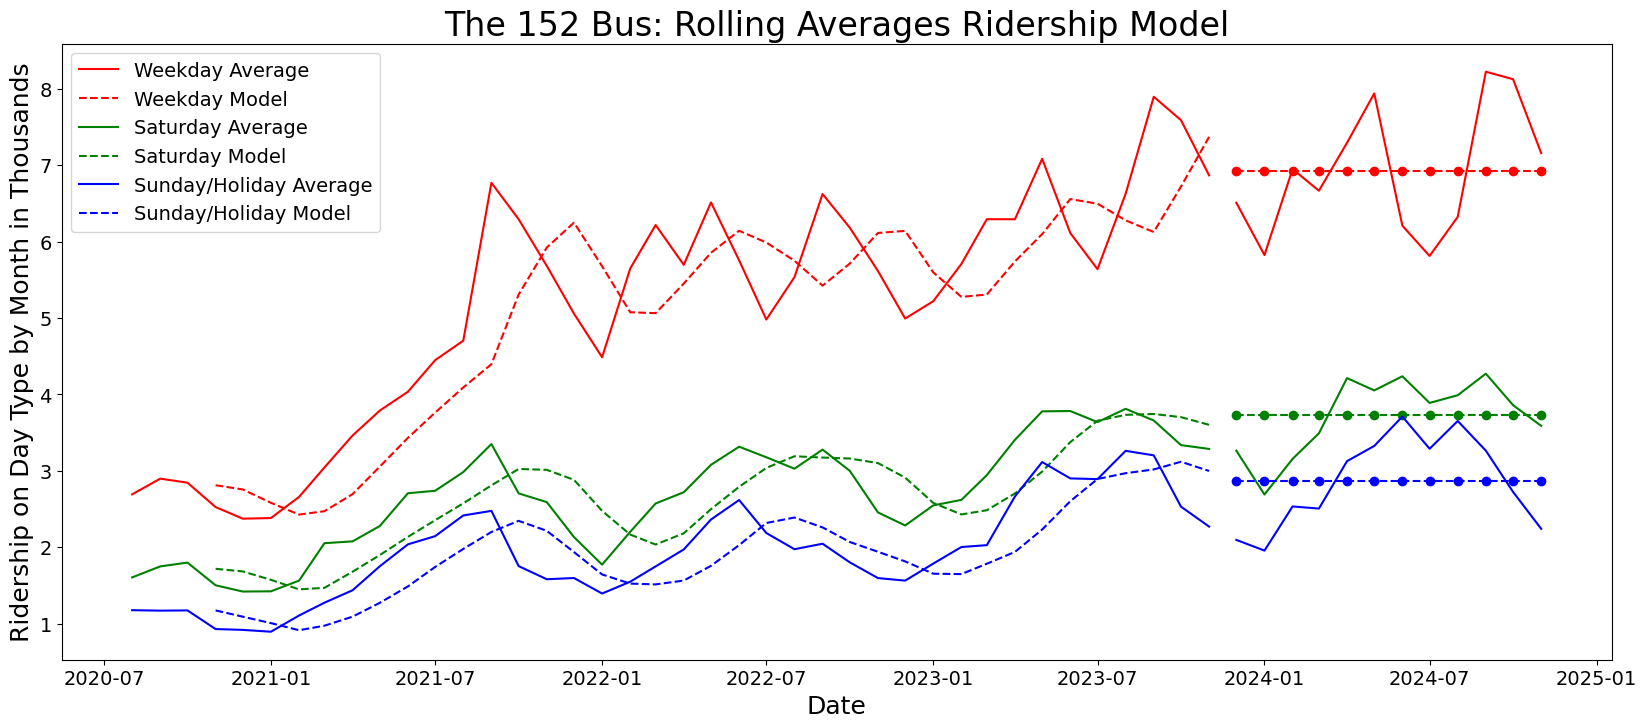

In [105]:
# Make plot
plt.figure(figsize=(20,8))

# Weekday
plt.plot(df_line_train.DATE, df_line_train.Weekday, 'r', label="Weekday Average")
plt.plot(df_line_train.DATE, df_line_train.Weekday.rolling(window=3, closed = 'left').mean() ,'r--', label="Weekday Model")
plt.plot(df_line_test.DATE, df_line_test.Weekday, 'r')
plt.plot(df_line_test.DATE, df_line_test.Weekday.mean()*np.ones(12), 'r--o')


# # Saturday
plt.plot(df_line_train.DATE, df_line_train.Saturday, 'g', label="Saturday Average")
plt.plot(df_line_train.DATE, df_line_train.Saturday.rolling(window=3, closed = 'left').mean(), 'g--', label="Saturday Model")
plt.plot(df_line_test.DATE, df_line_test.Saturday, 'g')
plt.plot(df_line_test.DATE, df_line_test.Saturday.mean()*np.ones(12), 'g--o')

# # Sunday - Holiday
plt.plot(df_line_train.DATE, df_line_train.SundayHoliday, 'b', label="Sunday/Holiday Average")
plt.plot(df_line_train.DATE,  df_line_train.SundayHoliday.rolling(window=3, closed = 'left').mean(), 'b--', label="Sunday/Holiday Model")
plt.plot(df_line_test.DATE, df_line_test.SundayHoliday, 'b')
plt.plot(df_line_test.DATE, df_line_test.SundayHoliday.mean()*np.ones(12), 'b--o')

# Aesthetics
plt.title("The "+line+" Bus: Rolling Averages Ridership Model", fontsize=24)
plt.xlabel("Date", fontsize=18)
plt.ylabel("Ridership on Day Type by Month in Thousands", fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(fontsize=14, loc=2)

# Save!
plt.savefig("ra_"+line+".png")

# Show!
plt.show()

In [108]:
bus_train_Weekday_fit

3061         NaN
3062         NaN
3052         NaN
3053         NaN
3054         NaN
3063         NaN
3067         NaN
3068         NaN
3069         NaN
3070         NaN
3071         NaN
3072         NaN
3073    3.373115
3074    3.620423
3064    4.159936
3065    4.576410
3066    4.854821
3075    4.996436
3079    5.015795
3080    5.186936
3081    5.407282
3082    5.506795
3083    5.703359
3084    5.748372
3085    5.652103
3086    5.634397
3076    5.773410
3077    5.846462
Name: Weekday, dtype: float64

In [152]:
# weights = np.array([i/78 for i in range(1,13)])
# bus_train_Weekday_fit =  df_line_train_train.Weekday.rolling(12, closed='left').apply(lambda x: np.dot(weights, x), raw=True)


weights = np.array([1.0/6, 1.0/6, 2.0/3])
bus_train_Weekday_fit =  df_line_train.Weekday.rolling(3, closed='left').apply(lambda x: np.dot(weights, x), raw=True)
bus_train_Saturday_fit =  df_line_train.Saturday.rolling(3, closed='left').apply(lambda x: np.dot(weights, x), raw=True)
bus_train_SundayHoliday_fit =  df_line_train.SundayHoliday.rolling(3, closed='left').apply(lambda x: np.dot(weights, x), raw=True)

In [153]:
len(bus_train_Weekday_fit)

40

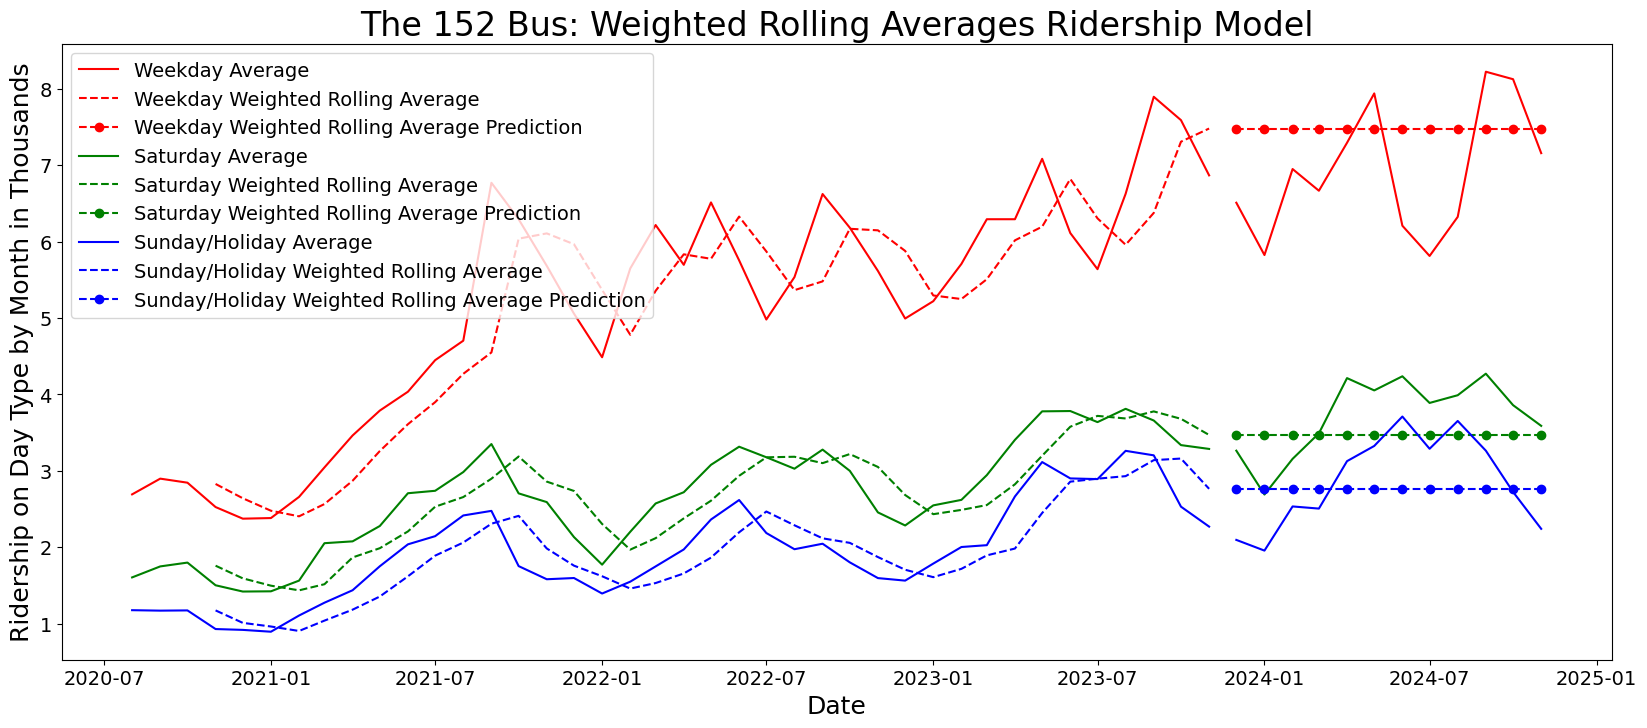

In [154]:
# Make plot
plt.figure(figsize=(20,8))

# Weekday
plt.plot(df_line_train.DATE, df_line_train.Weekday, 'r', label="Weekday Average")
plt.plot(df_line_train.DATE, bus_train_Weekday_fit ,'r--', label="Weekday Weighted Rolling Average")
plt.plot(df_line_test.DATE, bus_train_Weekday_fit.iloc[-1]*np.ones(12) ,'r--o', label="Weekday Weighted Rolling Average Prediction")
plt.plot(df_line_test.DATE, df_line_test.Weekday, 'r')



# Saturday
plt.plot(df_line_train.DATE, df_line_train.Saturday, 'g', label="Saturday Average")
plt.plot(df_line_train.DATE, bus_train_Saturday_fit ,'g--', label="Saturday Weighted Rolling Average")
plt.plot(df_line_test.DATE, bus_train_Saturday_fit.iloc[-1]*np.ones(12) ,'g--o', label="Saturday Weighted Rolling Average Prediction")
plt.plot(df_line_test.DATE, df_line_test.Saturday, 'g')

# Sunday - Holiday

plt.plot(df_line_train.DATE, df_line_train.SundayHoliday, 'b', label="Sunday/Holiday Average")
plt.plot(df_line_train.DATE, bus_train_SundayHoliday_fit ,'b--', label="Sunday/Holiday Weighted Rolling Average")
plt.plot(df_line_test.DATE, bus_train_SundayHoliday_fit.iloc[-1]*np.ones(12) ,'b--o', label="Sunday/Holiday Weighted Rolling Average Prediction")
plt.plot(df_line_test.DATE, df_line_test.SundayHoliday, 'b')
# plt.plot(df_line_train.DATE, df_line_train.SundayHoliday, 'b', label="Sunday/Holiday Average")
# plt.plot(df_line_train.DATE[-16:],  df_line_train_train.SundayHoliday.rolling(window=3, closed = 'left').mean()[-16:], 'b--', label="Sunday/Holiday Model")
# plt.plot(df_line_test.DATE, df_line_test.SundayHoliday, 'b')
# plt.plot(df_line_test.DATE, df_line_test.SundayHoliday.mean()*np.ones(12), 'b--o')

# Aesthetics
plt.title("The "+line+" Bus: Weighted Rolling Averages Ridership Model", fontsize=24)
plt.xlabel("Date", fontsize=18)
plt.ylabel("Ridership on Day Type by Month in Thousands", fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(fontsize=14, loc=2)

# Save!
plt.savefig("wra_"+line+".png")

# Show!
plt.show()